# Movie Recommender System


## EDA


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from surprise import Reader, Dataset, SVD, evaluate

import warnings; warnings.simplefilter('ignore')

In [3]:
# read in the table of movie information 
movie = pd.read_csv("/Users/wenjingyang/Documents/Winter 2018/MSiA423 - Analytics Value Chain/msia423_webapp/data/movies_metadata.csv")
movie.head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [35]:
# check NAs in all columns
movie.isnull().sum() 

level_0                      0
index                        0
adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                      0
title                        6
video                        6
vote_average                 6
vote_count                   6
description                  0
description_genre            0
dtype: int64

In [36]:
# check NAs in id column
movie['id'].isnull().sum()


0

In [37]:
# check NAs in title column
movie['title'].isnull().sum()

6

In [38]:
# check NAs in genres column
movie['genres'].isnull().sum()

0

In [39]:
# check the 6 rows of NA in titles
movie['title'].head(20)
movie[movie['title'].isnull()][['id']]

,id
19729,82663
19730,1997-08-20
29502,122662
29503,2012-09-29
35586,249260
35587,2014-01-01


In [40]:
# i found a method to check the abnormality in the id column. 
# Use the function pd.to_numeric() to check if there are only 3 rows with strange id
movie = movie.drop(movie.index[19730])
movie = movie.drop(movie.index[29502])
movie = movie.drop(movie.index[35585])
pd.to_numeric(movie['id'])

# no error message --> id column is fixed

0           862
1          8844
2         15602
3         31357
4         11862
5           949
6         11860
7         45325
8          9091
9           710
10         9087
11        12110
12        21032
13        10858
14         1408
15          524
16         4584
17            5
18         9273
19        11517
20         8012
21         1710
22         9691
23        12665
24          451
25        16420
26         9263
27        17015
28          902
29        37557
          ...  
45436     45527
45437    455661
45438    327237
45439     84710
45440     39562
45441     14008
45442     44330
45443     49279
45444     44333
45445     49277
45446     49271
45447     44324
45448    122036
45449     14885
45450     49280
45451    106807
45452    276895
45453    404604
45454    420346
45455     67179
45456     84419
45457    390959
45458    289923
45459    222848
45460     30840
45461    439050
45462    111109
45463     67758
45464    227506
45465    461257
Name: id, Length: 45463,

In [41]:
# continue checking NAs in titles
movie[movie['title'].isnull()][['id']]

,id
19729,82663
29502,122662
35586,249260


In [42]:
# drop the rows with NA in titles
movie = movie[movie.title.notnull()]
movie[movie['title'].isnull()][['id']]

,id


In [43]:
# check the data type 
movie['title']
movie['id'] = pd.to_numeric(movie['id'])
movie['id']

0           862
1          8844
2         15602
3         31357
4         11862
5           949
6         11860
7         45325
8          9091
9           710
10         9087
11        12110
12        21032
13        10858
14         1408
15          524
16         4584
17            5
18         9273
19        11517
20         8012
21         1710
22         9691
23        12665
24          451
25        16420
26         9263
27        17015
28          902
29        37557
          ...  
45436     45527
45437    455661
45438    327237
45439     84710
45440     39562
45441     14008
45442     44330
45443     49279
45444     44333
45445     49277
45446     49271
45447     44324
45448    122036
45449     14885
45450     49280
45451    106807
45452    276895
45453    404604
45454    420346
45455     67179
45456     84419
45457    390959
45458    289923
45459    222848
45460     30840
45461    439050
45462    111109
45463     67758
45464    227506
45465    461257
Name: id, Length: 45460,

In [59]:
# check the datatype of genre

movie['genres'] 
# let's deal with this column later 

0        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1        [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2        [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3        [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                           [{'id': 35, 'name': 'Comedy'}]
5        [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
6        [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
7        [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
8        [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
9        [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...
10       [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
11       [{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...
12       [{'id': 10751, 'name': 'Family'}, {'id': 16, '...
13       [{'id': 36, 'name': 'History'}, {'id': 18, 'na...
14       [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
15       [{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...
16       [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n.

In [5]:
# read in the table of ratings
rating = pd.read_csv("/Users/wenjingyang/Documents/Winter 2018/MSiA423 - Analytics Value Chain/msia423_webapp/data/ratings.csv")

In [6]:
# check NAs in columns
rating.isnull().sum()

# no NAs in the dataset

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [62]:
# check data types
rating['userId']
rating['movieId']
rating['rating']

0           1.0
1           4.5
2           5.0
3           5.0
4           5.0
5           4.0
6           4.5
7           5.0
8           4.0
9           4.0
10          5.0
11          5.0
12          4.0
13          3.5
14          4.0
15          5.0
16          5.0
17          5.0
18          5.0
19          5.0
20          2.5
21          5.0
22          5.0
23          5.0
24          0.5
25          4.0
26          5.0
27          3.0
28          3.0
29          2.0
           ... 
26024259    3.5
26024260    5.0
26024261    4.0
26024262    3.0
26024263    3.5
26024264    4.5
26024265    4.0
26024266    5.0
26024267    4.5
26024268    5.0
26024269    5.0
26024270    4.0
26024271    4.0
26024272    5.0
26024273    2.5
26024274    4.5
26024275    4.5
26024276    3.5
26024277    3.0
26024278    4.0
26024279    4.5
26024280    4.0
26024281    5.0
26024282    3.5
26024283    4.5
26024284    5.0
26024285    5.0
26024286    4.5
26024287    4.5
26024288    2.0
Name: rating, Length: 26

(array([  404897.,   843310.,   403607.,  1762440.,  1255358.,  5256722.,
         3116213.,  6998802.,  2170441.,  3812499.]),
 array([ 0.5 ,  0.95,  1.4 ,  1.85,  2.3 ,  2.75,  3.2 ,  3.65,  4.1 ,
         4.55,  5.  ]),
 <a list of 10 Patch objects>)

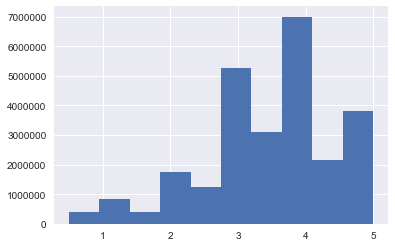

In [63]:
# plot the rating
plt.hist(rating['rating'])

In [64]:
# calculate the number of movie ratings for users
movie_1_user = rating.groupby('userId',as_index=False).agg({'movieId':[np.size]})
movie_1_user.columns = ['userId','movie_sum']
movie_1_user.head(10)

,userId,movie_sum
0,1,27
1,2,22
2,3,10
3,4,62
4,5,26
5,6,4
6,7,53
7,8,113
8,9,84
9,10,13


In [65]:
# calculate the avg rating of each person --> detect the personalized factor (which we can use as weight in the following calculations)
user_avg_rating = rating.groupby('userId').agg({'rating':[np.sum]})
user_avg_rating.columns = ['rating_sum']
user_avg_rating = user_avg_rating['rating_sum']/movie_1_user['movie_sum']
user_avg_rating.columns = ['rating_avg']
user_avg_rating.head(10)


0          NaN
1     5.250000
2     7.300000
3     0.500000
4     8.346154
5    27.750000
6     0.283019
7     1.579646
8     4.023810
9    24.884615
dtype: float64

In [66]:
# find the top10 most rated movies (the times of being rated)
rating_1_movie = rating.groupby('movieId').agg({'rating':[np.size]})
rating_1_movie.columns = ['rating_times']
rating_1_movie.sort_values(by='rating_times',ascending=False).head(10)

,rating_times
movieId,
356,91921.0
318,91082.0
296,87901.0
593,84078.0
2571,77960.0
260,77045.0
480,74355.0
527,67662.0
110,66512.0


In [67]:
# find the top10 highest rated movies (movies with highest average ratings)
movie_avg_rating = rating.groupby('movieId').agg({'rating':[np.sum]})
movie_avg_rating.head(10)
movie_avg_rating.columns = ['rating_sum'] 
movie_avg_rating = movie_avg_rating['rating_sum']/rating_1_movie['rating_times']
movie_avg_rating.columns = ['avg_rating']

In [68]:
# Next time, we need to merge the movie table and rating table together to have a better
# idea of the distributions of each movie titles. Then, with the information collected this week
# and other knowledge about recommender systems i will learn next week, i should build the initial
# recommender model for the data on my local machine.

### I first want to build a recommender system based on movie descriptions. 

In [4]:
# deal with genre column
movie['genres'] = movie['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
movie.head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[Action, Crime, Drama, Thriller]",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[Comedy, Romance]",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[Action, Adventure, Drama, Family]",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[Action, Adventure, Thriller]",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[Adventure, Action, Thriller]",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


In [5]:
# deal with descriptions
movie['tagline'] = movie['tagline'].fillna('')
movie['description'] = movie['overview'] + movie['tagline'] 
movie['description'] = movie['description'].fillna('')


In [6]:
movie['description'].head(10)

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
5    Obsessive master thief, Neil McCauley leads a ...
6    An ugly duckling having undergone a remarkable...
7    A mischievous young boy, Tom Sawyer, witnesses...
8    International action superstar Jean Claude Van...
9    James Bond must unmask the mysterious head of ...
Name: description, dtype: object

In [8]:
# transform description into matrix
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movie['description'])

In [9]:
# check the size of the matrix
tfidf_matrix.shape

(45466, 1104495)

In [10]:
#I will use cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. 
#For efficiency, I will use sklearn's linear_kernel instead of cosine_similarities.

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# now i have a pairwise cosine similarity matrix for all movies in the dataset

In [11]:
movie = movie.reset_index()
titles = movie['title']
indices = pd.Series(movie.index, index=movie['title'])

In [12]:
indices.head(10)

title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
Heat                           5
Sabrina                        6
Tom and Huck                   7
Sudden Death                   8
GoldenEye                      9
dtype: int64

In [13]:
# def the function to get movie recommendations
def recommendations(title):
    index = indices[title]
    sim_scores = list(enumerate(cosine_sim[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [14]:
# try the function
recommendations("Forrest Gump").head(10)

33726                 Underdog Knight 2
13513                    Nigdy w życiu!
10966              An American Haunting
9214                        Crane World
16747    Chronicle of the Years of Fire
31658                             Feast
9684         The Ballad of the Sad Cafe
25350                        Killer Cop
21989                       Amber Alert
31280          Astronaut: The Last Push
Name: title, dtype: object

In [15]:
# let's now redefine the function to make sure only 10 movies will be recommended
def get_recommendations(title):
    index = indices[title]
    sim_scores = list(enumerate(cosine_sim[index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices].head(10)

In [16]:
get_recommendations("The Godfather")

44030    The Godfather Trilogy: 1972-1990
1178               The Godfather: Part II
31973                    Honor Thy Father
21614                          The Family
23126                          Blood Ties
38030            A Mother Should Be Loved
18322                     The Outside Man
11297                    Household Saints
10821                            Election
4324                                 Made
Name: title, dtype: object

### I then add genre to the recommendation criterion. 

In [17]:
# adding genre to the criterion
movie['description_genre'] = movie['description']+ movie['genres'].apply(lambda x: ' '.join(x))

In [18]:
movie['description_genre'].head(10)

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
5    Obsessive master thief, Neil McCauley leads a ...
6    An ugly duckling having undergone a remarkable...
7    A mischievous young boy, Tom Sawyer, witnesses...
8    International action superstar Jean Claude Van...
9    James Bond must unmask the mysterious head of ...
Name: description_genre, dtype: object

In [19]:
# creating the matrix
count = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
count_matrix = count.fit_transform(movie['description_genre'])

In [20]:
# using the same cosine similarity method to create the pairwise matrix
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [21]:
movie = movie.reset_index()
titles = movie['title']
indices = pd.Series(movie.index, index=movie['title'])
indices.head(10)

title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
Heat                           5
Sabrina                        6
Tom and Huck                   7
Sudden Death                   8
GoldenEye                      9
dtype: int64

In [22]:
# use get_recommendations() defined before
get_recommendations("The Godfather")


# This new recommender system tends to work worse than the first one.
# So, i would keep the first one.

28276            Un milliard dans un billard
29450                 Mörderische Erpressung
37564            Between Eleven and Midnight
38496                                A Crime
39270              Barrela: Escola de Crimes
41698    Paradies 505. Ein Niederbayernkrimi
42775                                  Petos
18023                        A Cab for Three
24177                                 Cement
28267        Judge Fayard Called the Sheriff
Name: title, dtype: object

### Considering the descriptions of movies are too general, I would like to try a different way to conduct the content-based recommender system. I will first try to use movie director, main actors, genre, and keywords to build a new recommender system following the previous logic.

In [24]:
# read in credits and keywords
credit = pd.read_csv("/Users/wenjingyang/Documents/Winter 2018/MSiA423 - Analytics Value Chain/msia423_webapp/data/credits.csv")
keyword = pd.read_csv("/Users/wenjingyang/Documents/Winter 2018/MSiA423 - Analytics Value Chain/msia423_webapp/data/keywords.csv")

In [25]:
# have a peak of the table
credit.head(10)
keyword.head(10)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
5,949,"[{'id': 642, 'name': 'robbery'}, {'id': 703, '..."
6,11860,"[{'id': 90, 'name': 'paris'}, {'id': 380, 'nam..."
7,45325,[]
8,9091,"[{'id': 949, 'name': 'terrorist'}, {'id': 1562..."
9,710,"[{'id': 701, 'name': 'cuba'}, {'id': 769, 'nam..."


In [26]:
# transform the data type of id column
keyword['id'] = keyword['id'].astype('int')
credit['id'] = credit['id'].astype('int')

In [44]:
movie['id'] = movie['id'].astype('int')

In [45]:
# merge movie, keyword, credit
movie_merge = movie.merge(keyword, on='id')
movie_merge = movie_merge.merge(credit, on='id')

In [46]:
# have a peak of the merged table
movie_merge.head(10)

,level_0,index,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,tagline,title,video,vote_average,vote_count,description,description_genre,keywords,cast,crew
0,0,0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,...,,Toy Story,False,7.7,5415.0,"Led by Woody, Andy's toys live happily in his ...","Led by Woody, Andy's toys live happily in his ...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,1,1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,...,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,When siblings Judy and Peter discover an encha...,When siblings Judy and Peter discover an encha...,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,2,2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,...,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,A family wedding reignites the ancient feud be...,A family wedding reignites the ancient feud be...,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,3,3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,...,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"Cheated on, mistreated and stepped on, the wom...","Cheated on, mistreated and stepped on, the wom...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,4,4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,...,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,Just when George Banks has recovered from his ...,Just when George Banks has recovered from his ...,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."
5,5,5,False,NaN,60000000,"[Action, Crime, Drama, Thriller]",NaN,949,tt0113277,en,...,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,"Obsessive master thief, Neil McCauley leads a ...","Obsessive master thief, Neil McCauley leads a ...","[{'id': 642, 'name': 'robbery'}, {'id': 703, '...","[{'cast_id': 25, 'character': 'Lt. Vincent Han...","[{'credit_id': '52fe4292c3a36847f802916d', 'de..."
6,6,6,False,NaN,58000000,"[Comedy, Romance]",NaN,11860,tt0114319,en,...,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0,An ugly duckling having undergone a remarkable...,An ugly duckling having undergone a remarkable...,"[{'id': 90, 'name': 'paris'}, {'id': 380, 'nam...","[{'cast_id': 1, 'character': 'Linus Larrabee',...","[{'credit_id': '52fe44959251416c75039da9', 'de..."
7,7,7,False,NaN,0,"[Action, Adventure, Drama, Family]",NaN,45325,tt0112302,en,...,The Original Bad Boys.,Tom and Huck,False,5.4,45.0,"A mischievous young boy, Tom Sawyer, witnesses...","A mischievous young boy, Tom Sawyer, witnesses...",[],"[{'cast_id': 2, 'character': 'Tom Sawyer', 'cr...","[{'credit_id': '52fe46bdc3a36847f810f797', 'de..."
8,8,8,False,NaN,35000000,"[Action, Adventure, Thriller]",NaN,9091,tt0114576,en,...,Terror goes into overtime.,Sudden Death,False,5.5,174.0,International action superstar Jean Claude Van...,International action superstar Jean Claude Van...,"[{'id': 949, 'name': 'terrorist'}, {'id': 1562...","[{'cast_id': 1, 'character': 'Darren Francis T...","[{'credit_id': '52fe44dbc3a36847f80ae0f1', 'de..."
9,9,9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[Adventure, Action, T

In [47]:
# for the credits table:
# we only take directors from crew
# and pick the top2 actors from cast
movie_merge['cast'] = movie_merge['cast'].apply(literal_eval)
movie_merge['crew'] = movie_merge['crew'].apply(literal_eval)
movie_merge['keywords'] = movie_merge['keywords'].apply(literal_eval)
movie_merge['cast_size'] = movie_merge['cast'].apply(lambda x: len(x))
movie_merge['crew_size'] = movie_merge['crew'].apply(lambda x: len(x))

In [48]:
# extract director from crew
def get_director(input):
    for item in input:
        if (item['job'] == 'Director'):
            return item['name']
    return np.nan

In [49]:
movie_merge['director'] = movie_merge['crew'].apply(get_director)

In [50]:
movie_merge['director'].head(10)

0      John Lasseter
1       Joe Johnston
2      Howard Deutch
3    Forest Whitaker
4      Charles Shyer
5       Michael Mann
6     Sydney Pollack
7       Peter Hewitt
8        Peter Hyams
9    Martin Campbell
Name: director, dtype: object

In [51]:
# extract actors from cast
movie_merge['cast'] = movie_merge['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
movie_merge['cast'] = movie_merge['cast'].apply(lambda x: x[:2] if len(x) >=2 else x)
movie_merge['cast'].head(10)

0                    [Tom Hanks, Tim Allen]
1           [Robin Williams, Jonathan Hyde]
2             [Walter Matthau, Jack Lemmon]
3         [Whitney Houston, Angela Bassett]
4              [Steve Martin, Diane Keaton]
5               [Al Pacino, Robert De Niro]
6             [Harrison Ford, Julia Ormond]
7     [Jonathan Taylor Thomas, Brad Renfro]
8    [Jean-Claude Van Damme, Powers Boothe]
9               [Pierce Brosnan, Sean Bean]
Name: cast, dtype: object

In [52]:
# deal with keywords
movie_merge['keywords'] = movie_merge['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [53]:
movie_merge['keywords'].head(10)

0    [jealousy, toy, boy, friendship, friends, riva...
1    [board game, disappearance, based on children'...
2    [fishing, best friend, duringcreditsstinger, o...
3    [based on novel, interracial relationship, sin...
4    [baby, midlife crisis, confidence, aging, daug...
5    [robbery, detective, bank, obsession, chase, s...
6    [paris, brother brother relationship, chauffeu...
7                                                   []
8      [terrorist, hostage, explosive, vice president]
9    [cuba, falsely accused, secret identity, compu...
Name: keywords, dtype: object

In [54]:
# tranform actors into lower case
movie_merge['cast'] = movie_merge['cast'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [55]:
# transform directors into lower case
movie_merge['director'] = movie_merge['director'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))
movie_merge['director'] = movie_merge['director'].apply(lambda x: [x,x, x])

In [56]:
# count the frequency of each keywords
s = movie_merge.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'keyword'

In [57]:
s = s.value_counts()
s[:5]

woman director      3128
independent film    1942
murder              1314
based on novel       840
musical              734
Name: keyword, dtype: int64

In [58]:
# As i am doing frequency count, the keyword with frequency as 1 should be dropped.
s = s[s>1]

In [59]:
# we have to make sure singular and plural forms of a word can be recognized as one single word
stemmer = SnowballStemmer('english')

In [60]:
# filter keywords
def filter_keywords(x):
    words = []
    for item in x:
        if item in s:
            words.append(item)
    return words

In [61]:
movie_merge['keywords'] = movie_merge['keywords'].apply(filter_keywords)
movie_merge['keywords'] = movie_merge['keywords'].apply(lambda x: [stemmer.stem(i) for i in x])
movie_merge['keywords'] = movie_merge['keywords'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [62]:
movie_merge['criteria'] = movie_merge['keywords'] + movie_merge['cast'] + movie_merge['director'] + movie_merge['genres']
movie_merge['criteria'] = movie_merge['criteria'].apply(lambda x: ' '.join(x))

In [63]:
count = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
count_matrix = count.fit_transform(movie_merge['criteria'])
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [64]:
titles = movie_merge['title']
indices = pd.Series(movie_merge.index, index=movie_merge['title'])

In [65]:
get_recommendations('The Godfather')

# Now, we have a better recommender system.

4470     Tucker: The Man and His Dream
15609                  The Rain People
1199            The Godfather: Part II
1614                     The Rainmaker
6040                One from the Heart
4602                   The Cotton Club
23142                       Captain EO
4012                  Gardens of Stone
1934           The Godfather: Part III
3635                  The Conversation
Name: title, dtype: object

In [66]:
get_recommendations('Forrest Gump')

39087                  The Lift
8280     I Wanna Hold Your Hand
5035                  Used Cars
42076                    Allied
3924                  Cast Away
3167          Death Becomes Her
3703          What Lies Beneath
31692                  The Walk
14566         A Christmas Carol
8321          The Polar Express
Name: title, dtype: object